In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

In [10]:
df = pd.read_csv(r'C:\Users\Me\Desktop\LabFinals\Labs\Lab10\CC GENERAL.csv')

df = df.drop('CUST_ID',axis=1)
df = df.fillna(df.mean())

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [11]:
wcss = []
k_range = range(1,11)

for k in k_range:
    kmeans = KMeans(n_clusters = k, init='k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

    

In [12]:
wcss

[152150.0000000002,
 127784.92103208769,
 111986.69806610126,
 99073.93763633876,
 91503.39081843373,
 84851.13240432597,
 79545.26887086984,
 74624.92755740602,
 69831.88782117782,
 66454.83871932818]

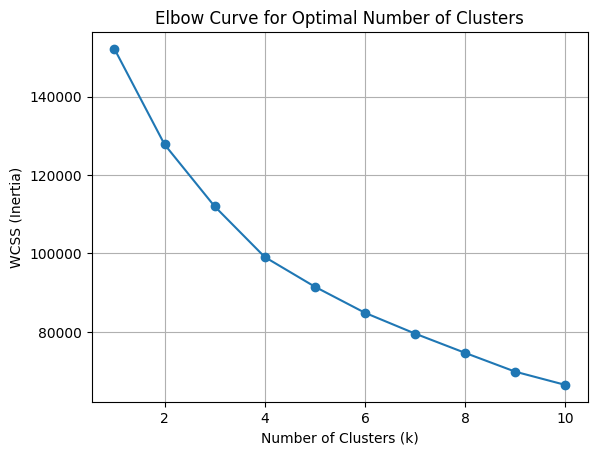

In [15]:
plt.plot(k_range, wcss, marker='o')
plt.title("Elbow Curve for Optimal Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.grid(True)
plt.show()

In [16]:
k_optimal = 4 

kmeans = KMeans(n_clusters=k_optimal, init='k-means++',max_iter = 300, n_init = 10, random_state=0)
clusters = kmeans.fit_predict(df_scaled)

df['Cluster'] = clusters

print(df.head())

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

In [17]:
cluster_summary = df.groupby('Cluster').mean()
print("\nCluster Summary:\n")
print(cluster_summary)


Cluster Summary:

             BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                  
0         894.768927           0.934715  1236.263333        593.995933   
1        4602.462714           0.968415   501.896219        320.373681   
2        3551.153761           0.986879  7681.620098       5095.878826   
3        1011.839396           0.789924   270.144981        209.932625   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                    642.541696    209.816318             0.885255   
1                    181.607404   4520.724309             0.287731   
2                   2587.208264    653.638891             0.946418   
3                     60.479311    596.300906             0.170250   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                   